In [1]:
import numpy as np
import math 

In [2]:
import random
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
vec1=np.zeros(100)
vec2=np.zeros(100)
vec3=np.zeros(100)

In [4]:
for i in range(0,100):
    vec1[i]=random.uniform(-100,100)
    vec2[i]=random.uniform(-100,100)
    vec3[i]=random.uniform(-100,100)

In [5]:
mat=np.array([vec1,vec2,vec3])

In [6]:
mat=mat.T

In [7]:
mat.shape

(100, 3)

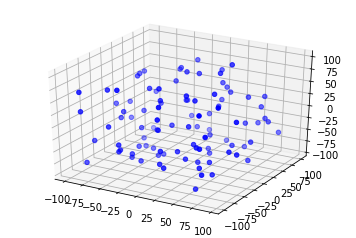

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vec1, vec2, vec3, c = 'b', marker='o')


In this section we are going to calculate the Weight function used in C-I-C interpolation. The weight function is defined as:
$W=1-\frac{|x-x_p|}{H}$ for $|x-x_p|<H$ and 0 otherwise

First remember that $x$ is the particle position and $x_p$ is the cell (on the grid position). With this in mind we must first calculate the position of every cell.  

In [9]:
def W(x,xp,H):
    wx=0
    if abs(xp-x)<=H:
        wx=(1-abs(xp-x)/H)
    else:
        wx=0
    return wx

Now, the density is given by: $\rho(x_p)=Cons\sum_{i}^{N_p}W(x_i-x_p)$

In [10]:
def rho(xpar,xcel,H):
    den=0
    for j in range(0,len(xpar)) :
        den=den+W(xpar[j],xcel,H)
    return den

Testing with 100 random positions in a line of length 20units between [-10, 10]

In [11]:
vecx=np.zeros(100)
for j in range(0,100):
    vecx[j]=random.uniform(-10,10)

Partitioning the line into 20 grids each centered at the middle of the units 

In [12]:
celdax=np.arange(-10.0, 11.0,1.0)

In [13]:
denx=np.zeros(len(celdax))
for i in range(0,21):
    denx[i]=rho(vecx,celdax[i],1)

If we sum over all grids, we get the total number of particles:

In [14]:
sum(denx)

100.0

Changing the number of particles to 1200

In [15]:
vecx1=np.zeros(1200)
for j in range(0,1200):
    vecx1[j]=random.uniform(-10,10)

In [16]:
denx1=np.zeros(len(celdax))
for i in range(0,21):
    denx1[i]=rho(vecx1,celdax[i],1)

In [17]:
sum(denx1)

1200.0

In [18]:
celdax1=np.arange(-10.0, 10.0+20.0/6.0,20.0/6.0)

In [19]:
denx2=np.zeros(len(celdax1))
for i in range(0,7):
    denx2[i]=rho(vecx1,celdax1[i],(20.0/6.0))

In [20]:
sum(denx2)

1199.9999999999998

Now in 3D:

In [21]:
def Wt(x,xp,y,yp,z,zp,H):
    wx=0.0
    wy=0.0
    wz=0.0
    #x weight function
    if abs(xp-x)<=H:
        wx=(1-abs(xp-x)/H)
    else:
        wx=0.0
    #y weight funcion    
    if abs(yp-y)<=H:
        wy=(1-abs(yp-y)/H)
    else:
        wy=0.0
    #z weight funcion
    if abs(zp-z)<=H:
        wz=(1-abs(zp-z)/H)
    else:
        wz=0.0
    return wx*wy*wz

    
    

In [22]:
def rho3D(xpar,xcel,ypar,ycel,zpar,zcel,H):
    den=0
    for i in range(0,len(xpar)):
        for j in range(0,len(ypar)):
            for k in range(0,len(zpar)):
                den=den+Wt(xpar[i],xcel,ypar[j],ycel,zpar[k],zcel,H)
    return den

In [23]:
vecx3D=np.zeros(120)
vecy3D=np.zeros(120)
vecz3D=np.zeros(120)
for j in range(0,120):
    vecx3D[j]=random.uniform(-10,10)
    vecy3D[j]=random.uniform(-10,10)
    vecz3D[j]=random.uniform(-10,10)

In [24]:
celdax3D=np.arange(-10.0,11.0,5.0)
celday3D=np.arange(-10.0,11.0,5.0)
celdaz3D=np.arange(-10.0,11.0,5.0)

celdax3D

array([-10.,  -5.,   0.,   5.,  10.])

In [25]:
den3D=np.zeros((len(celdax3D),len(celday3D),len(celdaz3D)))

In [26]:
for i in range(0,5):
    for j in range(0,5):
        for k in range(0,5):
            den3D[i,j,k]=rho3D(vecx3D,celdax3D[i],vecy3D,celday3D[j],vecz3D,celdaz3D[k],1)


In [27]:
den3Dfla=den3D.flatten()

In [28]:
sum(den3Dfla)

7040.287515232889